# NH Dummy Data EDA

### Columns

- **user_id** : 유저 고유아이디
- **date** : 카드거래 승인 날짜/시간
- **franchise** : 가맹점이름
- **labeling** : 품목 라벨 (식품 : 1 , 의류 : 2,  교육 : 3 , 교통 : 4,  생활 : 5)
- **price** : 거래금액
- **district** : 거래지역 (구단위로 추출)
- **fn** : 가구 수 (1~5)
- **year** : 연도 (2020 고정)
- **month** : 월 (11 고정)
- **day** : 일 (1~30)
- **hour** : 시간 (7~23, 새벽 시간대의 지출 방지 - 랜덤 추출로 인한 한계)
- **minute** : 분 (0~59)
- **dayOfweek** : 요일 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
users=pd.read_csv('user_dummy.csv',encoding='cp949',date_parser='date')
print('데이터 크기 : ', users.shape)

데이터 크기 :  (70114, 13)


In [3]:
users.head(3)

,user_id,date,franchise,labeling,price,district,fn,year,month,day,hour,minute,dayOfweek
0,1,2020-11-02 12:12:00,(일반)코레일 신길환승통로(단기)의류패션점(경성패션)2,2,1080,영등포구,1,2020,11,2,12,12,0
1,1,2020-11-02 14:43:00,GI상사,5,1400,도봉구,1,2020,11,2,14,43,0
2,1,2020-11-02 23:40:00,(유)거북상회,1,1880,송파구,1,2020,11,2,23,40,0


### 전체 사용자 카드 승인 내역 횟수(한달 기준)

In [4]:
usage_cnt=users.groupby('user_id')['price'].count()

print('평균 : ',round(usage_cnt.mean(),1),'회')
print('최다 : ',usage_cnt.max(),'회')
print('최소 : ',usage_cnt.min(),'회')

평균 :  70.1 회
최다 :  100 회
최소 :  40 회


### 전체 사용자 지출 금액(한달 기준)

In [5]:
usage_amount=users.groupby('user_id')['price'].sum()

print('평균 : ',round(usage_amount.mean(),2),'원')
print('최대 : ',usage_amount.max(),'원')
print('최소 : ',usage_amount.min(),'원')

평균 :  1354213.12 원
최대 :  5674750 원
최소 :  232240 원


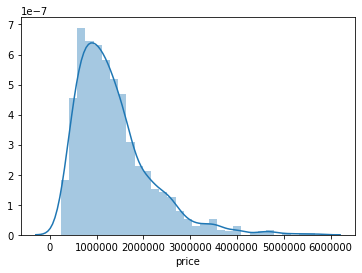

In [6]:
sns.distplot(usage_amount)

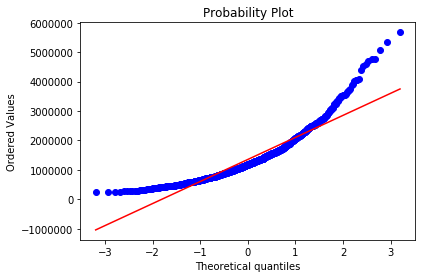

In [7]:
stats.probplot(usage_amount,plot=plt)
plt.show()

### 전체 거래 내역중 품목별 지출 빈도

(식품 : 1 , 의류 : 2, 교육 : 3 , 교통 : 4, 생활 : 5)

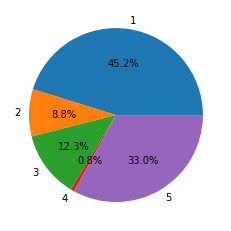

   labeling  count  rate
0         1  31681  0.45
1         2   6155  0.09
2         3   8634  0.12
3         4    529  0.01
4         5  23115  0.33


In [8]:
lbl_amount=pd.DataFrame(users.groupby('labeling')['price'].count()).reset_index()
lbl_amount.columns=['labeling','count']
lbl_amount['rate']=lbl_amount['count'].apply(lambda x:round(x/len(users),2))

plt.pie(lbl_amount['count'],labels=lbl_amount['labeling'],autopct='%.1f%%')
plt.show()

print(lbl_amount)

#### 전체 : 70114 (100%)

식품(1) : 31681 (45%)

생활(5) : 23115 (33%)

교육(3) : 8634 (12%)

의류(2) : 6155 (9%)

교통(4) : 529 (1%)

### 1~5인 가구 구성 비율

[361 248 228 113  50]


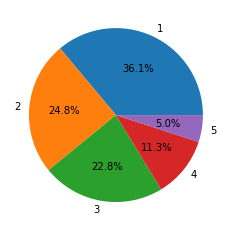

In [9]:
users['fn']=users['fn'].astype('category')

fn_ratio=users.drop_duplicates('user_id', keep='first').reset_index(drop=True)
fn_ratio=fn_ratio.groupby('fn')['price'].count().values

print(fn_ratio)
plt.pie(fn_ratio, labels=['1','2','3','4','5'],autopct='%.1f%%',counterclock=120)
plt.show()

#### 전체 1000명(100%)

1인 가구 : 361 (36.1%)  
2인 가구 : 248 (24.8%)  
3인 가구 : 228 (22.8%)  
4인 가구 : 113 (11.3%)  
5인 가구 : 50 (5%)  

### 1인~5인 가구별 지출 통계

In [10]:
id_price=users.groupby('user_id')['price'].sum().values
id_fn=users.drop_duplicates('user_id', keep='first').reset_index(drop=True)['fn']

household=pd.DataFrame({'user_id':np.arange(1,1001),
                        'price':id_price,
                       'fn':id_fn})

household.head()

,user_id,price,fn
0,1,499880,1
1,2,588750,1
2,3,1112740,1
3,4,893220,2
4,5,408380,1


In [11]:
household_1=household[household['fn']==1].reset_index(drop=True)
household_2=household[household['fn']==2].reset_index(drop=True)
household_3=household[household['fn']==3].reset_index(drop=True)
household_4=household[household['fn']==4].reset_index(drop=True)
household_5=household[household['fn']==5].reset_index(drop=True)

#### 1인 가구

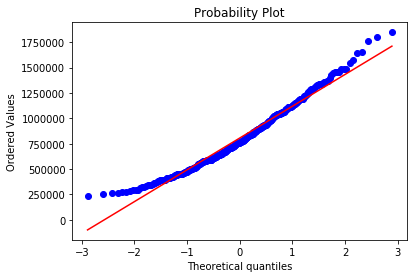

In [12]:
stats.probplot(household_1.price, plot=plt)
plt.show()

In [13]:
print('1인 가구 수 : ',len(household_1))
print('')
print('평균 지출 : ',round(household_1['price'].mean()))
print('최대 지출 : ',round(household_1['price'].max()))
print('최소 지출 : ',round(household_1['price'].min()))
print('')
print('지출 표준편차 : ',round(household_1['price'].std()))

1인 가구 수 :  361

평균 지출 :  805901
최대 지출 :  1848830
최소 지출 :  236270

지출 표준편차 :  315700


#### 2인 가구

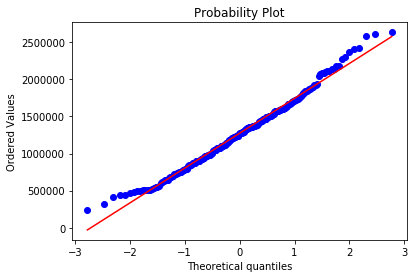

In [14]:
stats.probplot(household_2.price, plot=plt)
plt.show()

In [15]:
print('2인 가구 수 : ',len(household_2))
print('')
print('평균 지출 : ',round(household_2['price'].mean()))
print('최대 지출 : ',round(household_2['price'].max()))
print('최소 지출 : ',round(household_2['price'].min()))
print('')
print('지출 표준편차 : ',round(household_2['price'].std()))

2인 가구 수 :  248

평균 지출 :  1274104
최대 지출 :  2636550
최소 지출 :  232240

지출 표준편차 :  470007


#### 3인 가구

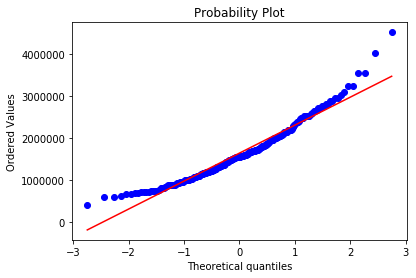

In [16]:
stats.probplot(household_3.price, plot=plt)
plt.show()

In [17]:
print('3인 가구 수 : ',len(household_3))
print('')
print('평균 지출 : ',round(household_3['price'].mean()))
print('최대 지출 : ',round(household_3['price'].max()))
print('최소 지출 : ',round(household_3['price'].min()))
print('')
print('지출 표준편차 : ',round(household_3['price'].std()))

3인 가구 수 :  228

평균 지출 :  1641776
최대 지출 :  4530310
최소 지출 :  389950

지출 표준편차 :  681791


#### 4인 가구

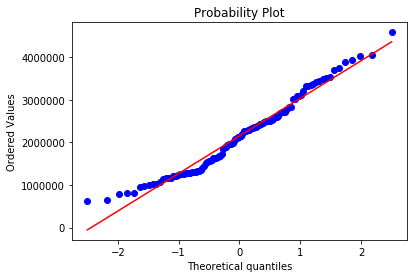

In [18]:
stats.probplot(household_4.price, plot=plt)
plt.show()

In [19]:
print('4인 가구 수 : ',len(household_4))
print('')
print('평균 지출 : ',round(household_4['price'].mean()))
print('최대 지출 : ',round(household_4['price'].max()))
print('최소 지출 : ',round(household_4['price'].min()))
print('')
print('지출 표준편차 : ',round(household_4['price'].std()))

4인 가구 수 :  113

평균 지출 :  2153303
최대 지출 :  4585860
최소 지출 :  629750

지출 표준편차 :  880902


#### 5인 가구

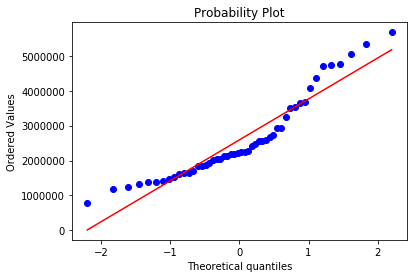

In [20]:
stats.probplot(household_5.price, plot=plt)
plt.show()

In [21]:
print('5인 가구 수 : ',len(household_5))
print('')
print('평균 지출 : ',round(household_5['price'].mean()))
print('최대 지출 : ',round(household_5['price'].max()))
print('최소 지출 : ',round(household_5['price'].min()))
print('')
print('지출 표준편차 : ',round(household_5['price'].std()))

5인 가구 수 :  50

평균 지출 :  2593140
최대 지출 :  5674750
최소 지출 :  774730

지출 표준편차 :  1198990


### 날짜(Day) 별 지출 통계

In [22]:
day_sum=users.groupby(['user_id','day'])['price'].sum().unstack().fillna(0)

print('일 별 평균지출')
day_sum.apply(lambda x : x.mean())

일 별 평균지출


day
1     40738.34
2     49124.26
3     43500.16
4     47410.90
5     44776.33
6     38607.59
7     43239.61
8     49384.48
9     48989.51
10    48474.61
11    44667.95
12    38831.67
13    40341.89
14    44142.22
15    46694.56
16    46622.97
17    45159.69
18    47840.86
19    43609.54
20    44607.28
21    44951.86
22    49645.75
23    48847.52
24    47539.26
25    41309.39
26    41315.81
27    49328.52
28    48328.54
29    44051.41
30    42130.64
dtype: float64

In [23]:
day_cnt=users.groupby(['user_id','day'])['price'].count().unstack().fillna(0)

print('일 별 평균 지출 건수')
day_cnt.apply(lambda x : x.mean())

일 별 평균 지출 건수


day
1     2.292
2     2.405
3     2.342
4     2.298
5     2.325
6     2.239
7     2.352
8     2.336
9     2.374
10    2.310
11    2.380
12    2.256
13    2.239
14    2.364
15    2.351
16    2.375
17    2.338
18    2.356
19    2.317
20    2.343
21    2.328
22    2.379
23    2.393
24    2.457
25    2.326
26    2.273
27    2.416
28    2.284
29    2.273
30    2.393
dtype: float64

### 요일 별 지출 통계

In [24]:
weekday=users.groupby(['user_id','dayOfweek'])['price'].sum().unstack().fillna(0)
weekday.columns=['월','화','수','목','금','토','일']

print('요일 별 평균지출')
weekday.columns,weekday.apply(lambda x : x.mean())

요일 별 평균지출


(Index(['월', '화', '수', '목', '금', '토', '일'], dtype='object'),
 월    235714.90
 화    184673.72
 수    181229.10
 목    168533.35
 금    172885.28
 토    180662.23
 일    230514.54
 dtype: float64)

In [25]:
weekday_cnt=users.groupby(['user_id','dayOfweek'])['price'].count().unstack().fillna(0)
weekday_cnt.columns=['월','화','수','목','금','토','일']

print('요일 별 평균지출 건')
weekday_cnt.apply(lambda x : x.mean())

요일 별 평균지출 건


월    11.940
화     9.447
수     9.360
목     9.171
금     9.237
토     9.328
일    11.631
dtype: float64

### 시간 별 지출 통계

In [26]:
hours=users.groupby(['user_id','hour'])['price'].sum().unstack().fillna(0)

print('시간 별 평균지출')
hours.apply(lambda x:x.mean())

시간 별 평균지출


hour
7     77451.08
8     81672.20
9     73675.77
10    75234.29
11    79147.50
12    81691.37
13    83231.71
14    82208.89
15    83452.85
16    80683.80
17    75526.46
18    84499.44
19    80321.31
20    79862.31
21    85382.50
22    75715.88
23    74455.76
dtype: float64

In [27]:
hours_cnt=users.groupby(['user_id','hour'])['price'].count().unstack().fillna(0)

print('시간 별 평균지출 건')
hours_cnt.apply(lambda x:x.mean())

시간 별 평균지출 건


hour
7     4.158
8     4.112
9     4.089
10    4.215
11    4.068
12    4.191
13    4.150
14    4.123
15    4.025
16    4.111
17    4.155
18    4.178
19    4.112
20    4.023
21    4.205
22    4.089
23    4.110
dtype: float64

### 사용자별 품목에 대한 지출 횟수

In [28]:
users.groupby(['user_id','labeling'])['price'].count().unstack().fillna(0)

labeling,1,2,3,4,5
user_id,,,,,
1,36.0,8.0,8.0,0.0,27.0
2,32.0,3.0,7.0,0.0,13.0
3,36.0,11.0,11.0,2.0,36.0
4,27.0,8.0,1.0,0.0,21.0
5,25.0,5.0,4.0,0.0,12.0
...,...,...,...,...,...
996,19.0,6.0,6.0,0.0,18.0
997,38.0,7.0,11.0,0.0,26.0
998,16.0,5.0,5.0,0.0,24.0


### 사용자별 품목에 대한 지출 금액

In [29]:
users.groupby(['user_id','labeling'])['price'].sum().unstack().fillna(0)

labeling,1,2,3,4,5
user_id,,,,,
1,65080.0,28620.0,116480.0,0.0,289700.0
2,53670.0,6070.0,91420.0,0.0,437590.0
3,44300.0,146230.0,196120.0,76890.0,649200.0
4,81570.0,55310.0,35080.0,0.0,721260.0
5,60210.0,41740.0,85840.0,0.0,220590.0
...,...,...,...,...,...
996,48320.0,105350.0,562400.0,0.0,1628640.0
997,147520.0,80900.0,565370.0,0.0,2703400.0
998,34360.0,39200.0,228030.0,0.0,1519590.0


### 일 별 품목에 대한 지출 횟수

In [30]:
day_label=users.groupby(['day','labeling'])['price'].count().unstack().fillna(0)
day_label['sum']=day_label[1]+day_label[2]+day_label[3]+day_label[4]+day_label[5]

day_label

labeling,1,2,3,4,5,sum
day,,,,,,
1,1012,183,297,13,787,2292
2,1064,215,292,14,820,2405
3,1062,214,277,18,771,2342
4,1010,201,292,22,773,2298
5,1024,196,326,16,763,2325
6,1022,185,269,18,745,2239
7,1078,210,277,25,762,2352
8,1014,210,277,19,816,2336
9,1079,209,256,28,802,2374


### 일 별 품목에 대한 지출 금액

In [31]:
users.groupby(['day','labeling'])['price'].sum().unstack().fillna(0)

labeling,1,2,3,4,5
day,,,,,
1,4565910,2012660,10822640,349390,22987740
2,3663200,2239300,10372480,225360,32623920
3,4527450,2637100,12228980,205120,23901510
4,3855630,2215010,11908960,376480,29054820
5,4365480,1980870,11430210,262730,26737040
6,4149310,2470640,9505200,159030,22323410
7,4346960,2415300,9877900,319240,26280210
8,3990030,2836450,10399780,514490,31643730
9,5100720,2152960,9770490,449340,31516000


### 요일별 품목에 대한 지출 건수

In [32]:
weekday_label=users.groupby(['dayOfweek','labeling'])['price'].count().unstack().fillna(0)

weekday_label.index=['월','화','수','목','금','토','일']

weekday_label

labeling,1,2,3,4,5
월,5387,1023,1518,90,3922
화,4330,813,1133,67,3104
수,4121,867,1130,70,3172
목,4140,830,1189,57,2955
금,4253,765,1115,88,3016
토,4281,832,1102,72,3041
일,5169,1025,1447,85,3905


### 요일별 품목에 대한 지출 금액

In [33]:
weekday_label_sum=users.groupby(['dayOfweek','labeling'])['price'].sum().unstack().fillna(0)
weekday_label_sum.index=['월','화','수','목','금','토','일']

weekday_label_sum

labeling,1,2,3,4,5
월,21550260,10614130,55601060,1271310,146678140
화,17926370,9912820,43517910,1956810,111359810
수,16016080,9841540,41450610,1515360,112405510
목,16478310,9720390,44848350,1218670,96267630
금,16153770,9582740,40586620,1963480,104598670
토,16699290,9901410,40914350,1758440,111388740
일,21912750,13528280,56120450,2537000,136416060


### 시간별 품목에 대한 지출 건수

In [34]:
hour_label=users.groupby(['hour','labeling'])['price'].count().unstack().fillna(0)

hour_label

labeling,1,2,3,4,5
hour,,,,,
7,1878,366,530,22,1362
8,1844,368,497,28,1375
9,1853,357,501,27,1351
10,1938,343,520,33,1381
11,1827,348,498,37,1358
12,1871,377,536,38,1369
13,1842,370,535,35,1368
14,1833,344,525,24,1397
15,1736,362,508,39,1380


### 시간별 품목에 대한 지출 금액

In [35]:
hour_label_sum=users.groupby(['hour','labeling'])['price'].sum().unstack().fillna(0)

hour_label_sum

labeling,1,2,3,4,5
hour,,,,,
7,7053860,4658990,19183700,508330,46046200
8,7285600,4040460,17364140,741190,52240810
9,7244850,3962770,20036510,1032140,41399500
10,7666130,3897920,19170210,674960,43825070
11,7169300,3670110,18314300,856350,49137440
12,7759120,4629850,21772890,737990,46791520
13,7353870,4520840,19784980,1109630,50462390
14,7974480,4278330,20269360,771880,48914840
15,6741730,4240900,20076410,962110,51431700
